In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [2]:
stock = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Train/VNI.csv', parse_dates=['Date'], index_col=0)
VNItest = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Test/VNI.csv',
                        parse_dates=['Date'], index_col='Date')
stock.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-12-31,"1,498.28","1,485.97","1,499.07","1,485.97",875.73K,0.83%
2021-12-30,"1,485.97","1,490.96","1,493.38","1,484.82",747.86K,0.01%
2021-12-29,"1,485.82","1,494.39","1,498.91","1,485.82",843.88K,-0.57%
2021-12-28,"1,494.39","1,488.88","1,499.77","1,483.97",1.00M,0.37%
2021-12-27,"1,488.88","1,477.03","1,490.12","1,469.91",752.11K,0.80%


In [3]:
stock.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [4]:
stock["Price"] = pd.to_numeric(stock["Price"].apply(lambda x: x.replace(",", "")))
stock = stock.iloc[::-1]

VNItest["Price"] = pd.to_numeric(VNItest["Price"].apply(lambda x: x.replace(",", "")))
VNItest = VNItest.iloc[::-1]

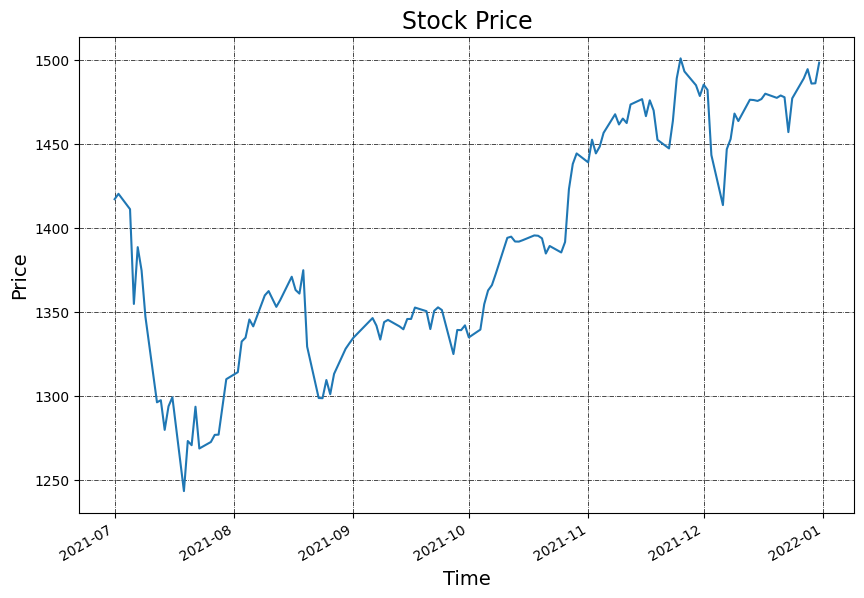

In [5]:
stock['Price'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

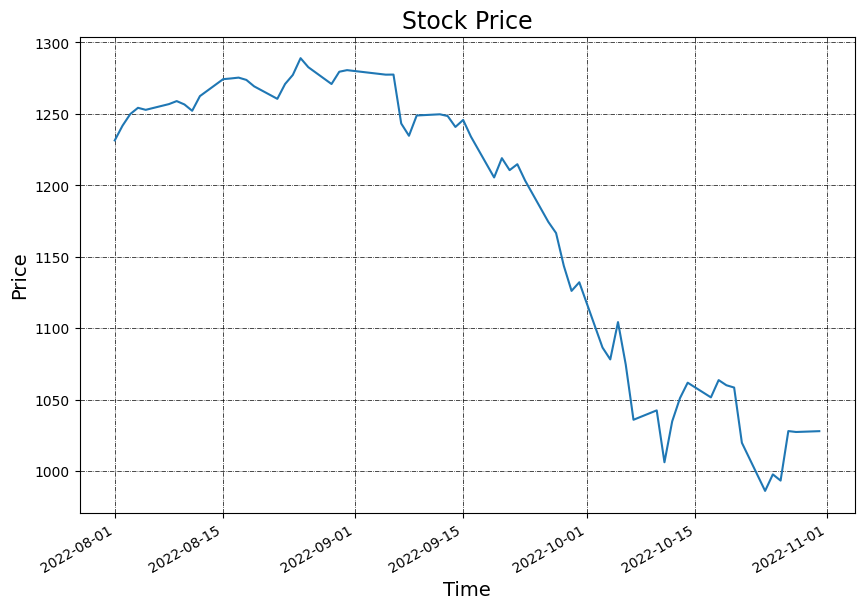

In [6]:
VNItest['Price'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [7]:
df = pd.DataFrame(stock, columns=['Price'])
df = df.reset_index()
df.head()

,Date,Price
0,2021-07-01,1417.08
1,2021-07-02,1420.27
2,2021-07-05,1411.13
3,2021-07-06,1354.79
4,2021-07-07,1388.55


In [8]:
test = pd.DataFrame(VNItest, columns=['Price'])
test = test.reset_index()
test.head()

,Date,Price
0,2022-08-01,1231.35
1,2022-08-02,1241.62
2,2022-08-03,1249.76
3,2022-08-04,1254.15
4,2022-08-05,1252.74


In [9]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=200, random_state=0)
X_train = np.array(df.index).reshape(-1, 1)
y_train = df['Price']
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=200, random_state=0)

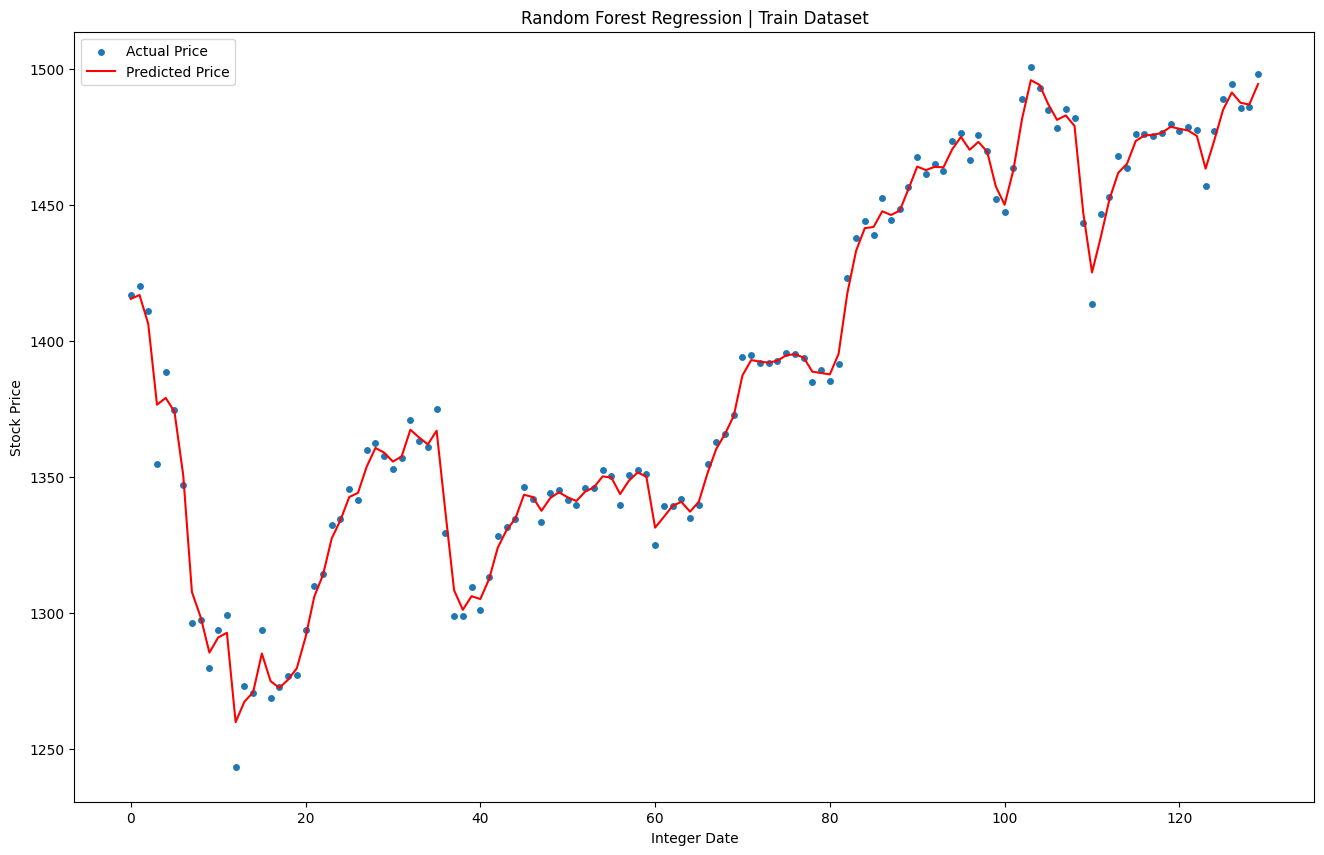

In [10]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Random Forest Regression | Train Dataset')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [11]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Price']
# Generate array with predicted values
y_pred = model.predict(X_test)

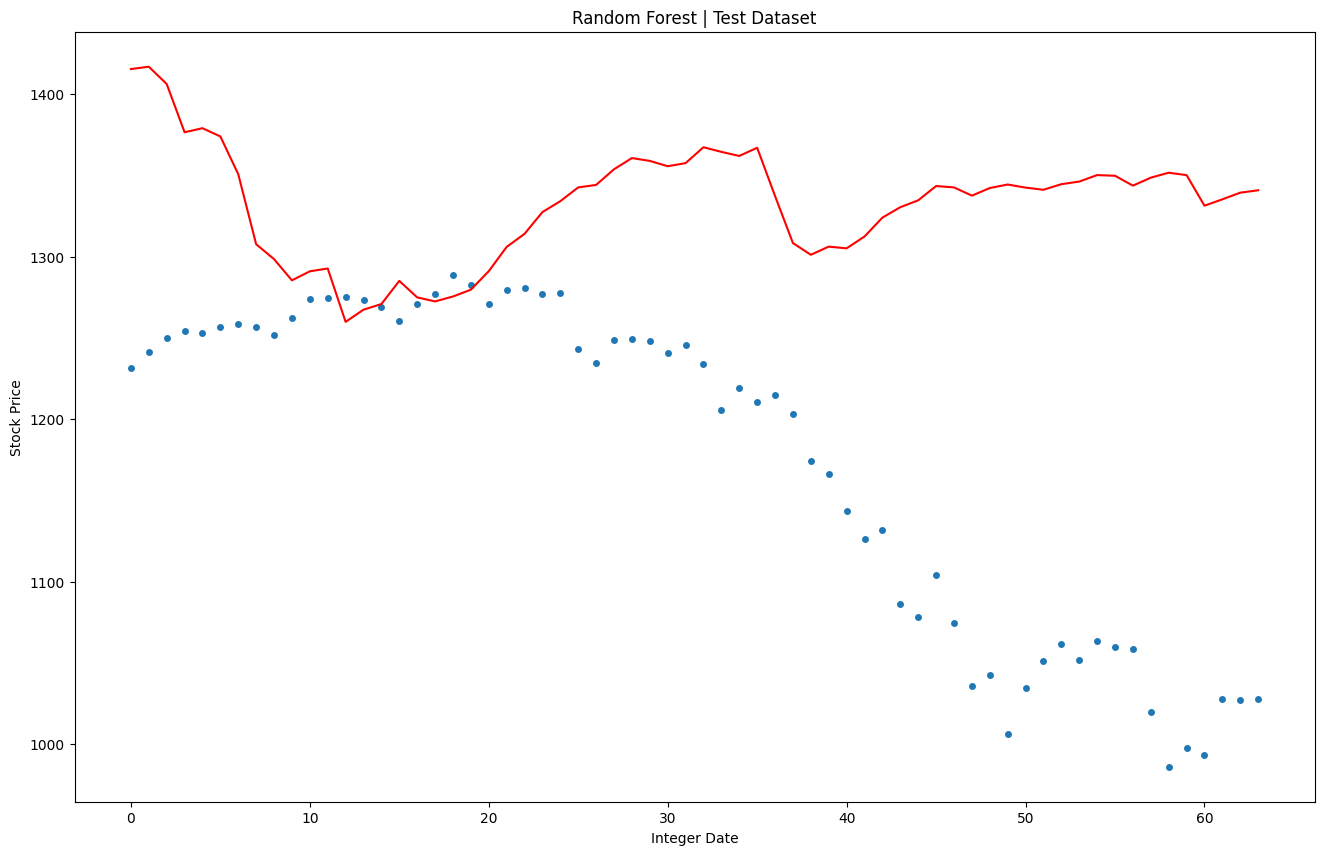

In [12]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Random Forest | Test Dataset')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price')

plt.show()

In [13]:
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))
df

,Date,Price,Prediction
0,2021-07-01,1417.08,1415.4686
1,2021-07-02,1420.27,1416.9041
2,2021-07-05,1411.13,1406.2882
3,2021-07-06,1354.79,1376.5787
4,2021-07-07,1388.55,1379.0714
...,...,...,...
125,2021-12-27,1488.88,1484.9786
126,2021-12-28,1494.39,1491.3408
127,2021-12-29,1485.82,1487.5555
128,2021-12-30,1485.97,1486.9150


In [14]:
test['Prediction'] = model.predict(np.array(test.index).reshape(-1, 1))
test

,Date,Price,Prediction
0,2022-08-01,1231.35,1415.4686
1,2022-08-02,1241.62,1416.9041
2,2022-08-03,1249.76,1406.2882
3,2022-08-04,1254.15,1376.5787
4,2022-08-05,1252.74,1379.0714
...,...,...,...
59,2022-10-25,997.70,1350.1961
60,2022-10-26,993.36,1331.3855
61,2022-10-27,1028.01,1335.3136
62,2022-10-28,1027.36,1339.4023


In [15]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics
# Statistical summary of test data
df['Price'].describe()

count     130.000000
mean     1388.673615
std        68.784144
min      1243.510000
25%      1339.580000
50%      1374.765000
75%      1460.365000
max      1500.810000
Name: Price, dtype: float64

In [16]:
# Calculate and print values of MAE, MSE, RMSE, R2
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 157.50013749999977
Mean Squared Error: 37510.79982084889
Root Mean Squared Error: 193.67705032049847
R2:  -2.694667975313654
